# EDS296 Final

**Marina Kochuten, Jordan Sibley, and Josephine Cardelle**

Spring 2025

---

## Introduction

Probably some markdown here

In [1]:
# Import libraries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import intake

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


## Metrics Definition

## Data I/O

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')


##### Search through catalog and store results #####
# CMCC Historic
res_cmcc_hist = catalog.search(
    activity_id = 'CMIP',
    source_id = 'CMCC-ESM2',
    experiment_id = 'historical',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CMCC SSP585
res_cmcc_fut = catalog.search(
    activity_id = 'ScenarioMIP',
    source_id = 'CMCC-ESM2',
    experiment_id = 'ssp585',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CanESM5 Historic
res_can_hist = catalog.search(
    activity_id = 'CMIP',
    source_id = 'CanESM5',
    experiment_id = 'historical',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# CanESM5 SSP585
res_can_fut = catalog.search(
    activity_id = 'ScenarioMIP',
    source_id = 'CanESM5',
    experiment_id = 'ssp585',
    member_id = 'r1i1p1f1',
    table_id = 'Amon',
    variable_id = {'tas', 'pr'}
)

# Look at the results
display(res_cmcc_hist.df)
display(res_cmcc_fut.df)
display(res_can_hist.df)
display(res_can_fut.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114
1,CMIP,CMCC,CMCC-ESM2,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CMCC/CMCC-ESM2/histo...,NaN,20210114


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CMCC,CMCC-ESM2,ssp585,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126
1,ScenarioMIP,CMCC,CMCC-ESM2,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CMCC/CMCC-ESM...,NaN,20210126


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


In [3]:
# Grab results and save as xarray objects ----

# Temp
cmcc_temp_hist = xr.open_zarr(res_cmcc_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
cmcc_temp_fut = xr.open_zarr(res_cmcc_fut.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
can_temp_hist = xr.open_zarr(res_can_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
can_temp_fut = xr.open_zarr(res_can_fut.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)

# Precip
cmcc_precip_hist = xr.open_zarr(res_cmcc_hist.df.iloc[1]['zstore'], storage_options={'anon': True}, consolidated=True)
cmcc_precip_fut = xr.open_zarr(res_cmcc_fut.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
can_precip_hist = xr.open_zarr(res_can_hist.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)
can_precip_fut = xr.open_zarr(res_can_fut.df.iloc[0]['zstore'], storage_options={'anon': True}, consolidated=True)

In [4]:
# Concat historic and future data for cmcc model ----

# Temp
cmcc_temp_data = xr.concat([cmcc_temp_hist, cmcc_temp_fut], dim="time")

# Precip
cmcc_precip_data = xr.concat([cmcc_precip_hist, cmcc_precip_fut], dim="time")

# Concat historic and future data for can model ----

# Temp
can_temp_data = xr.concat([can_temp_hist, can_temp_fut], dim="time")

#Precip
can_precip_data = xr.concat([can_precip_hist, can_precip_fut], dim="time")

## Metrics Computation

We are interesting in mapping the average over each time period for each of our models and variables. 

First we define our area and time periods of interest 

In [5]:
# Array with region of interest
# [lon_min, lon_max, lat_min, lat_max]
region = [108.31403, 153.6656, -12.303609, 18.847975]

# Array with time periods of interest
# [starting year, ending year]
per_early = [1975, 2025]
per_late = [2026, 2075]

# Convert time to datetime 
cmcc_temp_data['time'] = cmcc_temp_data.time.astype('datetime64[ns]')
can_temp_data['time'] = can_temp_data.time.astype('datetime64[ns]')
cmcc_precip_data['time'] = cmcc_precip_data.time.astype('datetime64[ns]')
can_precip_data['time'] = can_precip_data.time.astype('datetime64[ns]')

# Sort by time to fix time filtering error
cmcc_temp_data = cmcc_temp_data.sortby('time')
can_temp_data = can_temp_data.sortby('time')
cmcc_precip_data = cmcc_precip_data.sortby('time')
can_precip_data = can_precip_data.sortby('time')

In [6]:
# Select data within the ranges of years specified above

##### CMCC-ESM2 #####
# Early period temp
cmcc_temp_early = cmcc_temp_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period temp
cmcc_temp_late = cmcc_temp_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period precip
cmcc_precip_early = cmcc_precip_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period precip
cmcc_precip_late = cmcc_precip_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

##### CanESM5 #####
# Early period temp
can_temp_early = can_temp_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period temp
can_temp_late = can_temp_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))
# Early period precip
can_precip_early = can_precip_data.sel(time=slice(str(per_early[0])+"-01-01", str(per_early[1])+"-12-31"))
# Late period precip
can_precip_late = can_precip_data.sel(time=slice(str(per_late[0])+"-01-01", str(per_late[1])+"-12-31"))

In [44]:
# Convert precip data to daily
seconds_per_day = 86400

##### CMCC-ESM2 #####
cmcc_precip_early = cmcc_precip_early * seconds_per_day
cmcc_precip_late = cmcc_precip_late * seconds_per_day

##### CanESM5 #####
can_precip_early = can_precip_early * seconds_per_day
can_precip_late = can_precip_late * seconds_per_day

In [46]:
# Calculate time averages and convert

##### CMCC-ESM2 #####
# Temp
cmcc_temp_early_annmn = cmcc_temp_early.mean(dim="time") - 273.15
cmcc_temp_late_annmn = cmcc_temp_late.mean(dim="time") - 273.15
# Precip
cmcc_precip_early_annmn = cmcc_precip_early.mean(dim="time")
cmcc_precip_late_annmn = cmcc_precip_late.mean(dim="time")

##### CanESM5 #####
# Temp
can_temp_early_annmn = can_temp_early.mean(dim="time") - 273.15
can_temp_late_annmn = can_temp_late.mean(dim="time") - 273.15
# Precip
can_precip_early_annmn = can_precip_early.mean(dim="time")
can_precip_late_annmn = can_precip_late.mean(dim="time")

## Visualizations

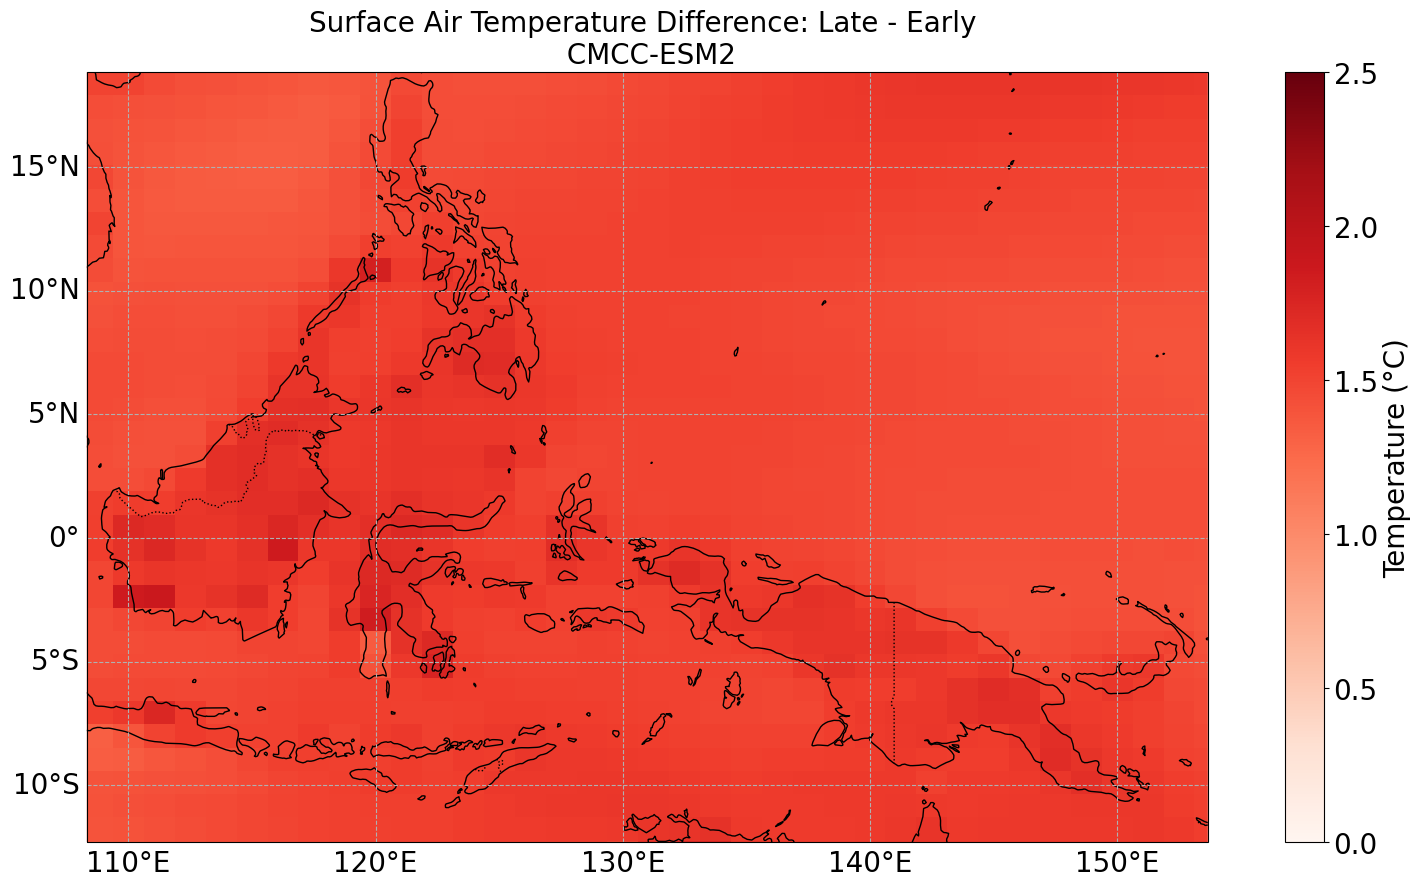

In [41]:
##### CMCC-ESM2 TEMP DIFFERENCES #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(cmcc_temp_late_annmn.lon, 
                     cmcc_temp_late_annmn.lat, 
                     cmcc_temp_late_annmn.tas - cmcc_temp_early_annmn.tas, 
                     transform=map, cmap="Reds", vmin=0, vmax=2.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Surface Air Temperature Difference: Late - Early \n CMCC-ESM2", fontsize= 20)
plt.show()

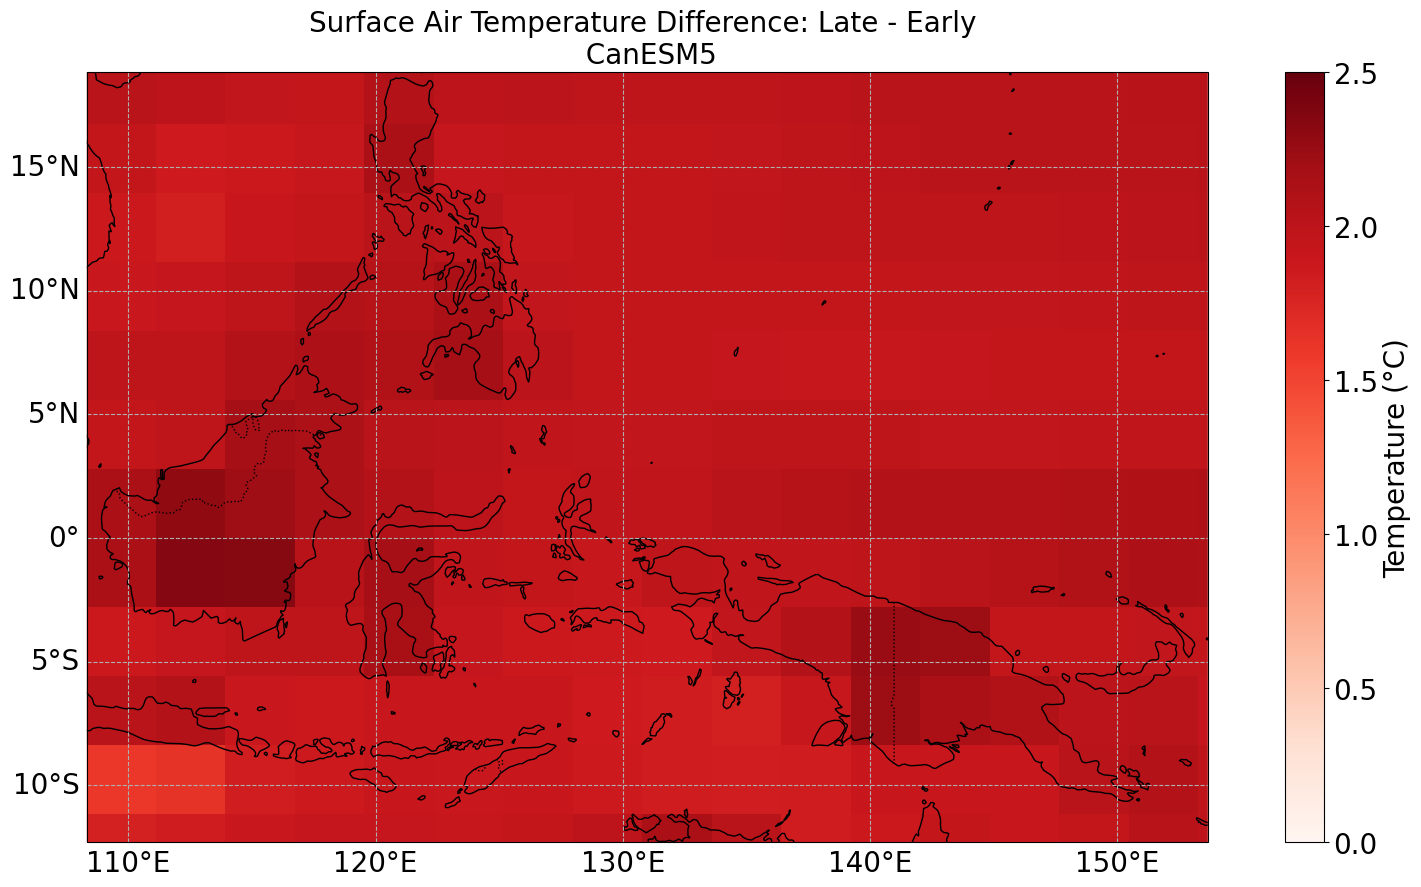

In [42]:
##### CanESM5 TEMP DIFFERENCES #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot temperature data on the axes using the coolwarm colormap
plot = ax.pcolormesh(can_temp_late_annmn.lon, 
                     can_temp_late_annmn.lat, 
                     can_temp_late_annmn.tas - can_temp_early_annmn.tas, 
                     transform=map, cmap="Reds", vmin=0, vmax=2.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Temperature (°C)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Surface Air Temperature Difference: Late - Early \n CanESM5", fontsize= 20)
plt.show()

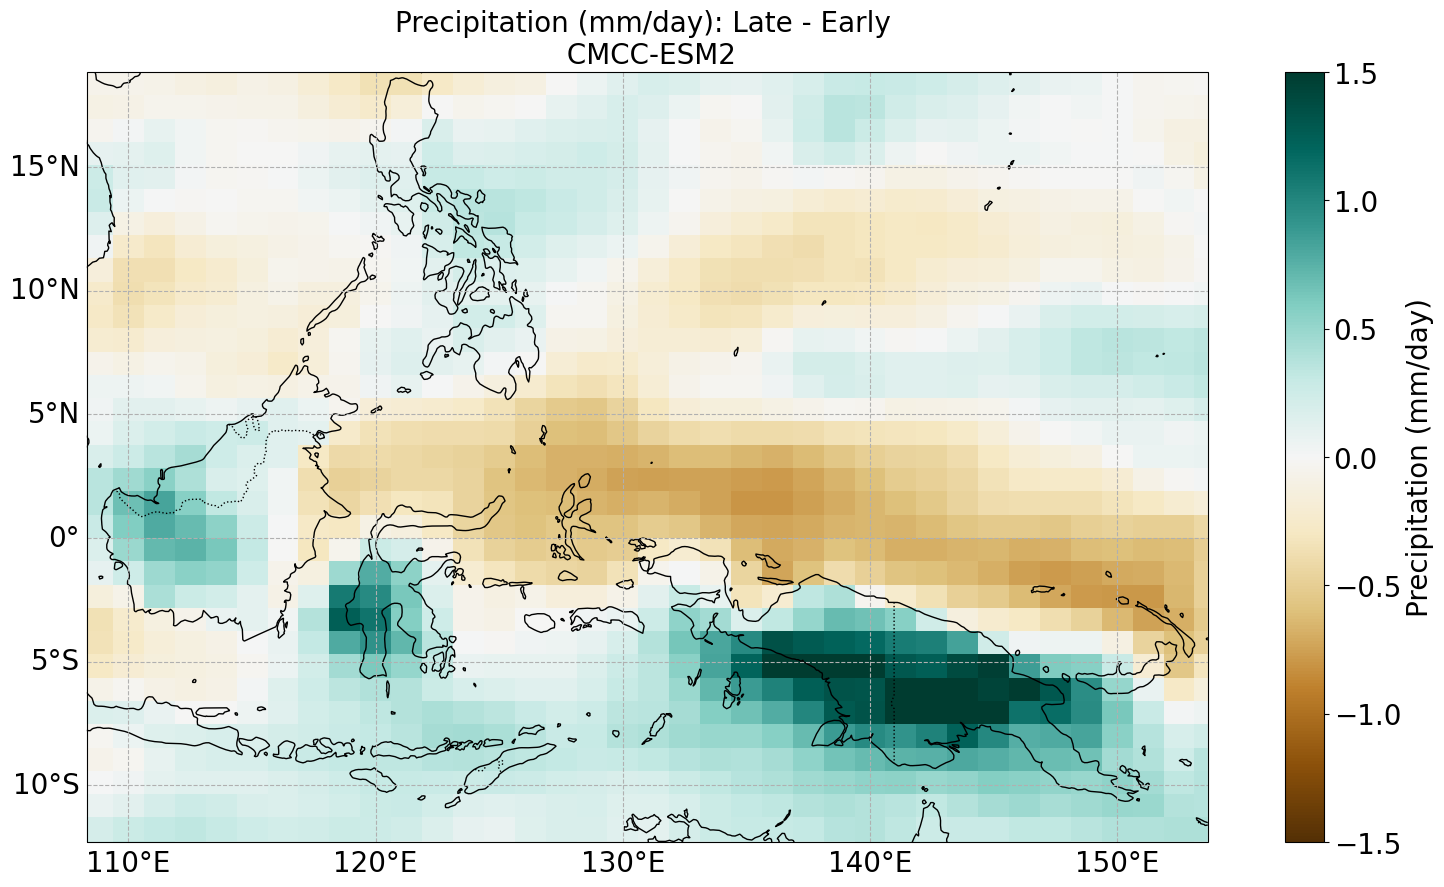

In [34]:
##### CMCC-ESM2 PRECIP DIFFERENCES #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot precip data on the axes
plot = ax.pcolormesh(cmcc_precip_late_annmn.lon, 
                     cmcc_precip_late_annmn.lat, 
                     cmcc_precip_late_annmn.pr - cmcc_precip_early_annmn.pr, 
                     transform=map, cmap="BrBG", vmin=-1.5, vmax=1.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Precipitation (mm/day)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Precipitation (mm/day): Late - Early \n CMCC-ESM2", fontsize= 20)
plt.show()

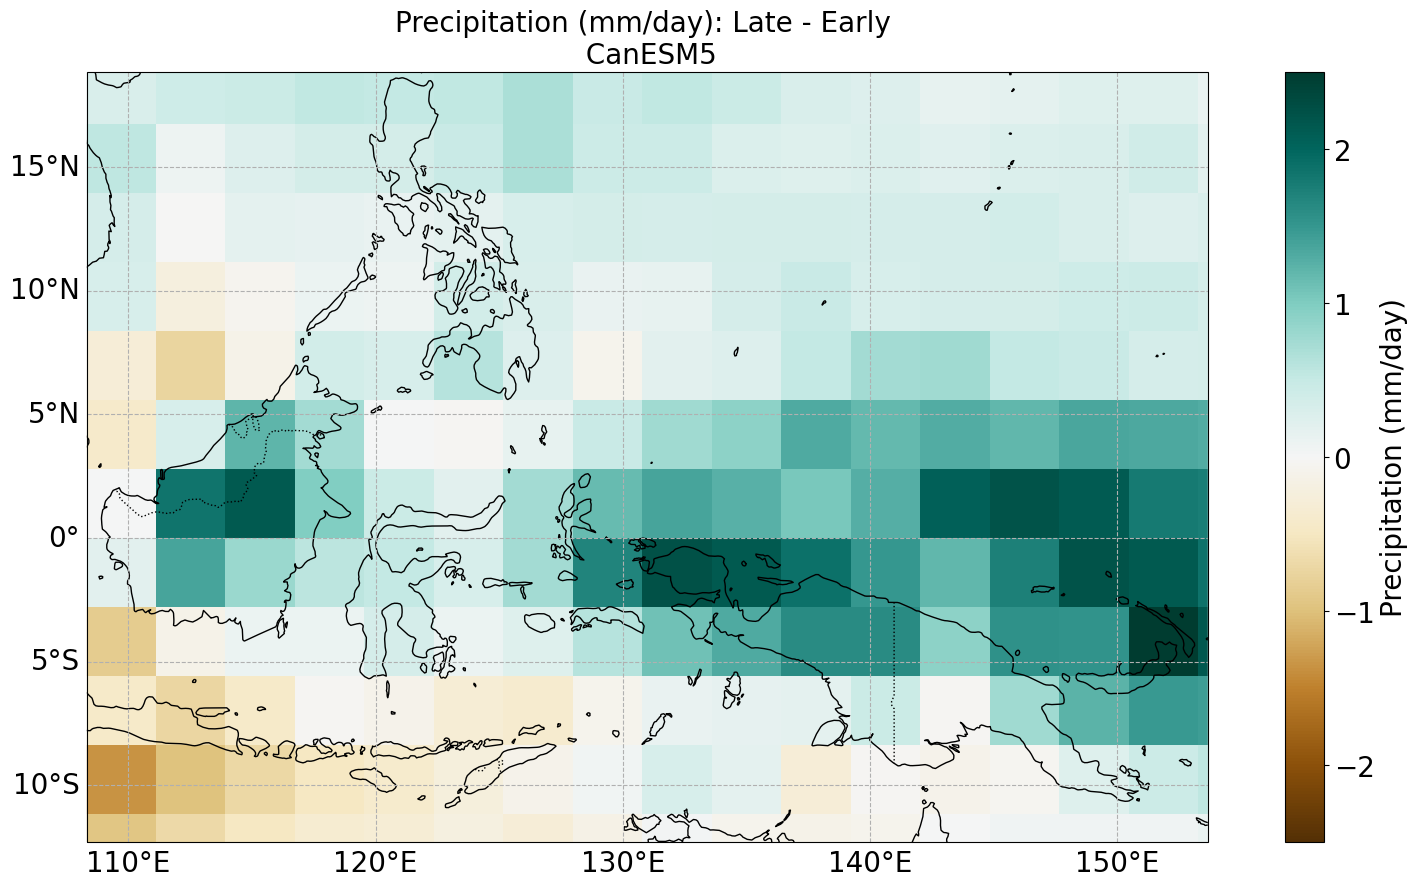

In [51]:
##### CanESM5 PRECIP DIFFERENCES #####

# Define object containing PlateCarree projection
map = ccrs.PlateCarree()

# Create figure/axis objects, use the map object to specify associated projection
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw={"projection": map})

# Plot precip data on the axes
plot = ax.pcolormesh(can_precip_late_annmn.lon, 
                     can_precip_late_annmn.lat, 
                     can_precip_late_annmn.pr - can_precip_early_annmn.pr, 
                     transform=map, cmap="BrBG", vmin=-2.5, vmax=2.5)

# Set spatial extent of plot
ax.set_extent(region, crs=ccrs.PlateCarree())

# Add colorbar and label it
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label("Precipitation (mm/day)", fontsize=20)
cbar.ax.tick_params(labelsize=20)

# Add coastline/border lines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, linestyle="--") 
gl.top_labels = False
gl.right_labels = False

# Set font size for x, y-axis labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add title, show plot
ax.set_title("Precipitation (mm/day): Late - Early \n CanESM5", fontsize= 20)
plt.show()

## Conclusions

Looking at our results, both climate models show clear warming across the whole region we studied. Both models showed all areas getting 1-2.5°C warmer by 2075. The consistency across the temperature models makes us confident that this warming will occur. This is a very concerning prediction. 1-2°C increase in temperature could have extreme effects on this region. This area is known as having some of the most biodiverse coral reefs in the world. With this increase in temperature, we risk coral bleaching, which would effect the whole ocean ecosystem and fisheries. It could also have huge effects on agriculutre. This region is known for rice farming, which is very sensitive to temperature. Higher temperature could effect crop yields, greatly effecting the surrounding communities. Warming could also contribute to sea level rise, which could be devestating for many coastal communities in this region. This region also already deals with yearly intense typhoons/monsoons, which would most likely become more frequent with temperature increase.

The precipitation results show much more complicated outputs. The two models differ on rainfall predictions. CMCC-ESM2 shows  the southern parts get wetter and the northern areas get drier, but CanESM5 shows increases in most areas. This difference in outputs reflects the uncertainty in precipitation in this region. One reason for this is complex ocean-atmosphere interactions. Since this region is composed primarily of islands, the ocean accounts for a large area of it, making these interactions a large variable in precipitation. The area also deals with unpredictable monsoons and typhoons. Lastly, el nino/la nina can dramatically effect rainfall in a given year. This uncertainty in rainfall makes it difficult for planning in the area. Rice farmers need to know how much rainfall they'll get in a year to predict crop production during growing seasons. It also makes it difficult to plan for water management and flooding/droughts. Water managmenet plans in this area need to be flexible and adaptive.

Overall, our models showed that this area could face some challenging climate scenarios in the future. Its important for the area to plan for warming, and be adaptive in their water management plans.